<a href="https://colab.research.google.com/github/sachinthadilshann/TensorFlow_for_Deep_Learning_Bootcamp_Udemy/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-01-27 16:41:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.8MB/s    in 5.8s    

2025-01-27 16:41:11 (17.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np


data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):

  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  #print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img



Image shape: (512, 512, 3)


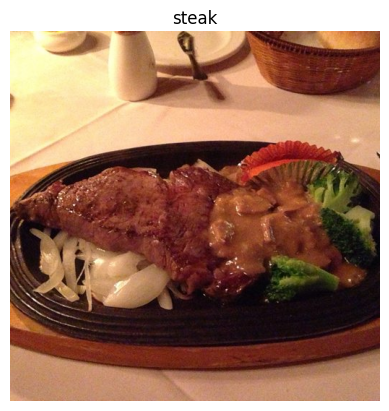

In [ ]:
img = view_random_image("pizza_steak/train/", "steak")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=True)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")

  ])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_1 = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 236ms/step - accuracy: 0.5748 - loss: 0.8003 - val_accuracy: 0.8340 - val_loss: 0.4198
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8000 - loss: 0.4669 - val_accuracy: 0.8480 - val_loss: 0.4105
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.8107 - loss: 0.4294 - val_accuracy: 0.8340 - val_loss: 0.4084


In [ ]:
result_1 = model_1.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8416 - loss: 0.3923


In [ ]:
 model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")

  ])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 602,141 (2.30 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_2 = model_2.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.4871 - loss: 0.7048 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.4969 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.4858 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
result_2 = model_2.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5179 - loss: 0.6931


In [ ]:
 tf.random.set_seed(42)

 model_3 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape = (224,224,3)),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")
 ])

 model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

 model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,073,201 (57.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_3 = model_3.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.5698 - loss: 4.4381 - val_accuracy: 0.7780 - val_loss: 0.5436
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.7099 - loss: 0.7030 - val_accuracy: 0.7220 - val_loss: 0.6112
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.7734 - loss: 0.5077 - val_accuracy: 0.7520 - val_loss: 0.5639


In [ ]:
result_3 = model_3.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.7718 - loss: 0.5518


Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


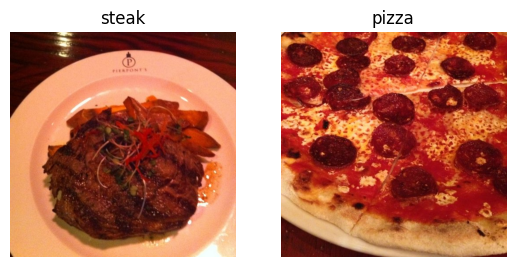

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
!nvidia-smi

Mon Jan 27 16:43:02 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              33W /  70W |   1703MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.


In [ ]:
test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 500 images belonging to 2 classes.


In [ ]:
images,labels = next(train_data)
len(images),len(labels)

(32, 32)

In [ ]:
images[:2],images[0].shape

(array([[[[0.97647065, 0.9450981 , 0.6627451 ],
          [0.97647065, 0.94117653, 0.67058825],
          [0.97647065, 0.94117653, 0.6862745 ],
          ...,
          [0.97647065, 0.90196085, 0.6039216 ],
          [0.9843138 , 0.90196085, 0.5921569 ],
          [0.9843138 , 0.90196085, 0.58431375]],
 
         [[0.9803922 , 0.9450981 , 0.68235296],
          [0.9803922 , 0.9450981 , 0.6901961 ],
          [0.9803922 , 0.94117653, 0.69803923],
          ...,
          [0.97647065, 0.909804  , 0.6039216 ],
          [0.97647065, 0.9058824 , 0.58431375],
          [0.9803922 , 0.909804  , 0.5803922 ]],
 
         [[0.9843138 , 0.9450981 , 0.7019608 ],
          [0.9843138 , 0.9450981 , 0.7058824 ],
          [0.9843138 , 0.9450981 , 0.7137255 ],
          ...,
          [0.9725491 , 0.909804  , 0.6039216 ],
          [0.9725491 , 0.91372555, 0.5882353 ],
          [0.97647065, 0.909804  , 0.5882353 ]],
 
         ...,
 
         [[0.13333334, 0.04313726, 0.01960784],
          [0.12549

In [ ]:
images[7].shape


(224, 224, 3)

In [ ]:
labels

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input

In [ ]:
model_4 = Sequential()
model_4.add(Conv2D(filters=10,
                   kernel_size=(3,3),
                   strides=1,
                   padding='valid',
                   activation='relu',
                   input_shape = (224,224,3)

                   ))
model_4.add(Conv2D(10,3,activation='relu'))
model_4.add(Conv2D(10,3,activation='relu'))
model_4.add(Flatten())
model_4.add(Dense(1,activation = 'sigmoid'))


In [ ]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
                )


In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(train_data),len(test_data)

(47, 16)

In [ ]:
#!pip install tensorboard

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

history_4 = model_4.fit(train_data,
            epochs = 5,
            validation_data = test_data,
            validation_steps = len(test_data),
            callbacks = [tensorboard_callback])

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - accuracy: 0.5279 - loss: 4.5712 - val_accuracy: 0.6600 - val_loss: 0.6018
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.7125 - loss: 0.5544
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.7925 - loss: 0.4456 - val_accuracy: 0.8080 - val_loss: 0.3947
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.8106 - loss: 0.3978
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.8886 - loss: 0.2823 - val_accuracy: 0.7960 - val_loss: 0.4177


In [ ]:
result_4 = model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8201 - loss: 0.4223


In [ ]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7843 - loss: 0.4340


[0.41773733496665955, 0.7960000038146973]

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(min(len(loss), len(val_loss)))


  plt.plot(epochs,loss[:len(epochs)],label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy[:len(epochs)],label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

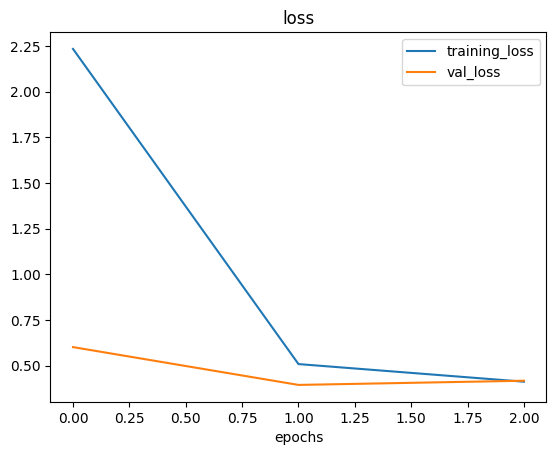

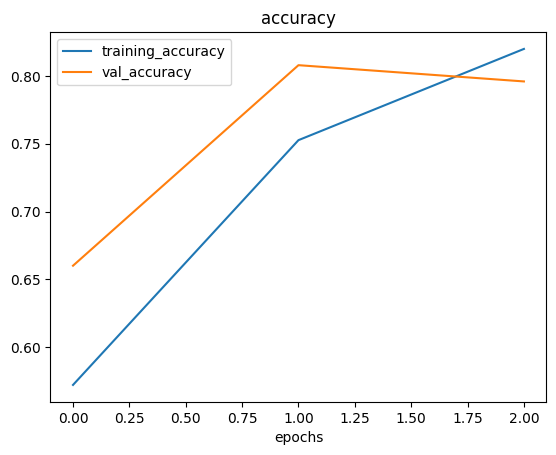

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
                )


In [ ]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,861 (34.61 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.5581 - loss: 0.6721 - val_accuracy: 0.7980 - val_loss: 0.4856
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.7752 - loss: 0.4731
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.7937 - loss: 0.4492 - val_accuracy: 0.8380 - val_loss: 0.3573
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.8225 - loss: 0.4054
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.8206 - loss: 0.3928 - val_accuracy: 0.8700 - val_loss: 0.3229


In [ ]:
result_5 = model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8667 - loss: 0.3221


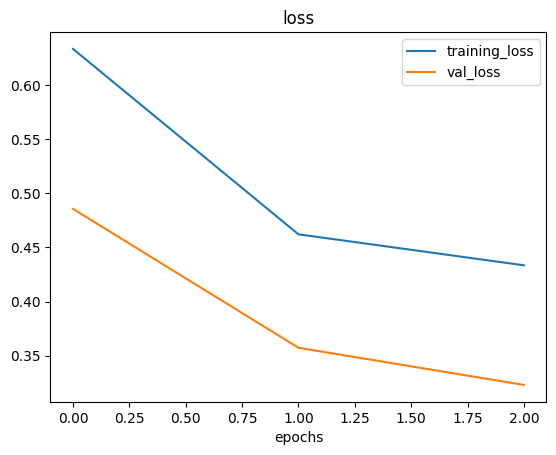

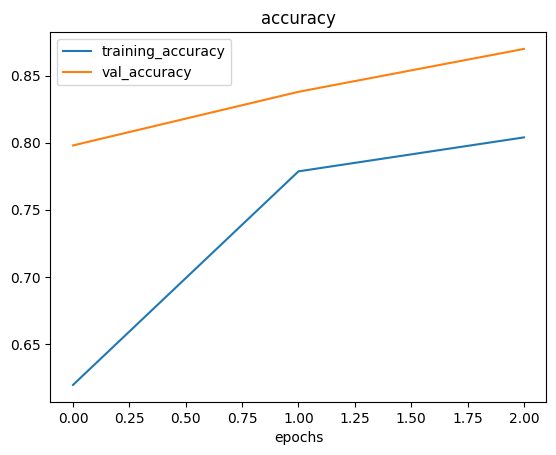

In [ ]:
plot_loss_curves(history_5)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range  =0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)



In [ ]:
print("Augmented data")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode = "binary",
                                                                   batch_size = 32,
                                                                   shuffle = False)

print("Non Augmented data")

IMG_SIZE =(224,224)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode ='binary',
                                               shuffle = False)


print("Unchanged Data")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode ='binary',
                                             shuffle = False)




Augmented data
Found 1500 images belonging to 2 classes.
Non Augmented data
Found 1500 images belonging to 2 classes.
Unchanged Data
Found 500 images belonging to 2 classes.


In [ ]:
images,labels  = next(train_data)
augmented_images,augmented_labels = next(train_data_augmented)

shwing image number: 11


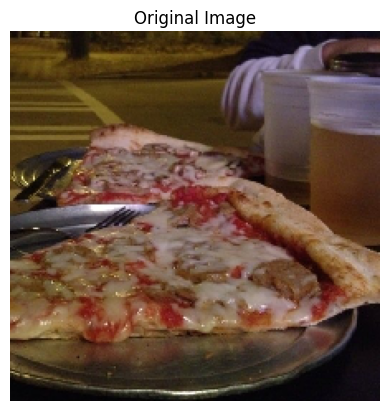

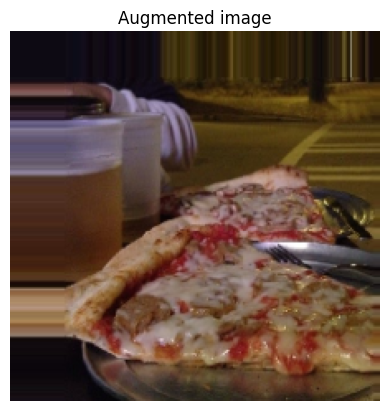

In [ ]:

random_number = random.randint(0,32)
print(f'shwing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False);

In [ ]:
model_6 = Sequential()
model_6.add(Conv2D(10,3,activation = 'relu'))
model_6.add(MaxPool2D())
model_6.add(Conv2D(10,3,activation = 'relu'))
model_6.add(MaxPool2D())
model_6.add(Conv2D(10,3,activation = 'relu'))
model_6.add(MaxPool2D())
model_6.add(Flatten())
model_6.add(Dense(1,activation = 'sigmoid'))

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_6 = model_6.fit(train_data_augmented,
                       epochs = 5,
                       validation_data = test_data,
                       validation_steps = int(0.25*len(test_data)))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 454ms/step - accuracy: 0.4713 - loss: 0.8143 - val_accuracy: 0.5520 - val_loss: 0.6765
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 354ms/step - accuracy: 0.5535 - loss: 0.6931
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 365ms/step - accuracy: 0.6309 - loss: 0.6743 - val_accuracy: 0.7840 - val_loss: 0.6292
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 367ms/step - accuracy: 0.6756 - loss: 0.6458
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 370ms/step - accuracy: 0.6703 - loss: 0.6234 - val_accuracy: 0.7880 - val_loss: 0.5479


In [ ]:
result_6 = model_6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8544 - loss: 0.4980


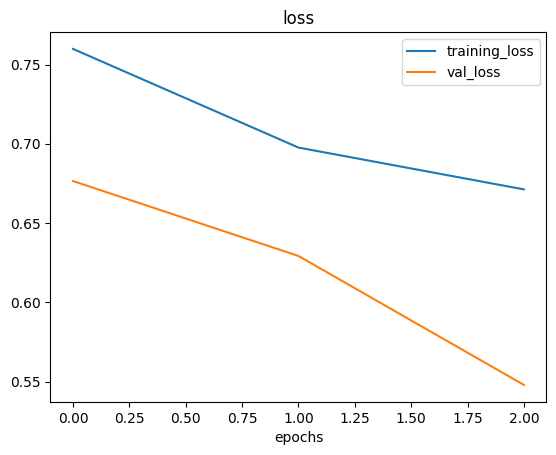

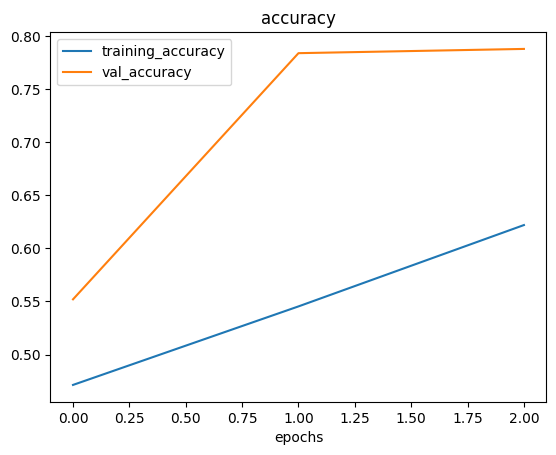

In [ ]:
plot_loss_curves(history_6)


In [ ]:
#shuffle the augmented data


train_data_augmented_shuffle =  train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential()
model_7.add(Conv2D(10,3,activation = 'relu'))
model_7.add(MaxPool2D())
model_7.add(Conv2D(10,3,activation = 'relu'))
model_7.add(MaxPool2D())
model_7.add(Conv2D(10,3,activation = 'relu'))
model_7.add(MaxPool2D())
model_7.add(Flatten())
model_7.add(Dense(1,activation = 'sigmoid'))

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

model_7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_7 = model_7.fit(train_data_augmented_shuffle,
                       epochs = 5,
                       validation_data = test_data,
                       validation_steps = int(0.25*len(test_data)))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 491ms/step - accuracy: 0.5163 - loss: 0.6852 - val_accuracy: 0.7700 - val_loss: 0.4919
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 477ms/step - accuracy: 0.6943 - loss: 0.5735
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 491ms/step - accuracy: 0.7776 - loss: 0.4926 - val_accuracy: 0.8420 - val_loss: 0.3820
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 458ms/step - accuracy: 0.7696 - loss: 0.4993
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 502ms/step - accuracy: 0.7739 - loss: 0.4729 - val_accuracy: 0.7780 - val_loss: 0.4556


In [ ]:
result_7 = model_7.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.6578 - loss: 0.6229


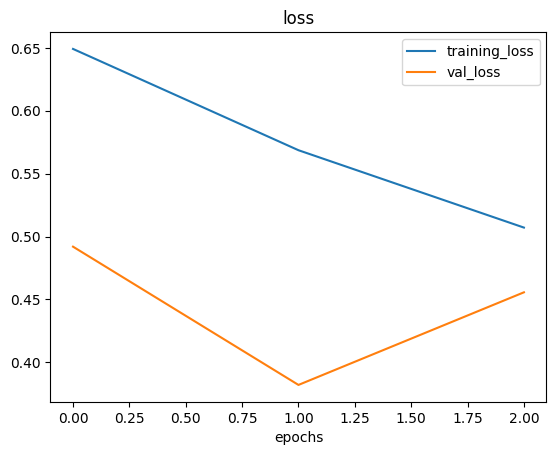

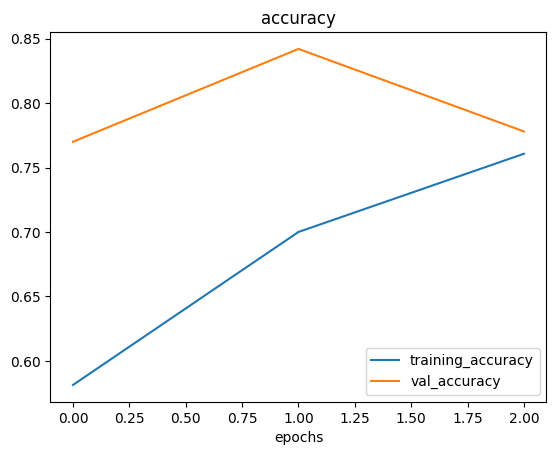

In [ ]:
plot_loss_curves(history_7)

In [ ]:
import pandas as pd


data = []
for i, result in enumerate([result_1, result_2, result_3, result_4, result_5, result_6, result_7]):

    data.append([f"Model {i+1}", result[0], result[1]])

result = pd.DataFrame(data=data, columns=["Model", "loss", "accuracy"])
result

,Model,loss,accuracy
0,Model 1,0.408423,0.834
1,Model 2,0.693147,0.500
2,Model 3,0.563916,0.752
3,Model 4,0.408423,0.834
4,Model 5,0.322943,0.870
5,Model 6,0.547854,0.788
6,Model 7,0.455648,0.778


In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2025-01-27 16:49:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2025-01-27 16:49:59 (122 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



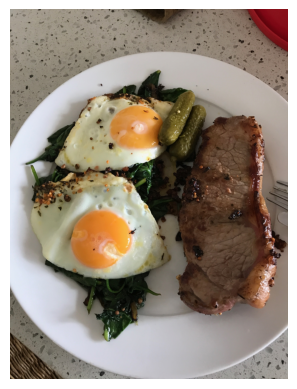

In [ ]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
def load_and_prep_image(filename,img_shape=224):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size = [img_shape,img_shape])
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')

In [ ]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


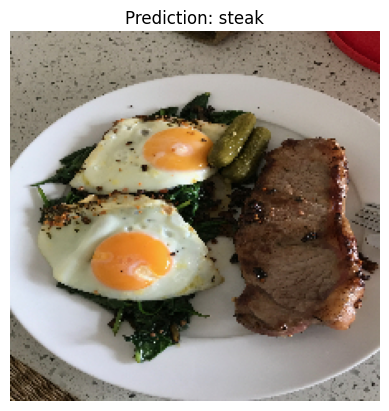

In [ ]:
pred_and_plot(model_7,"03-steak.jpeg",class_names)

--2025-01-27 16:50:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2025-01-27 16:50:03 (152 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


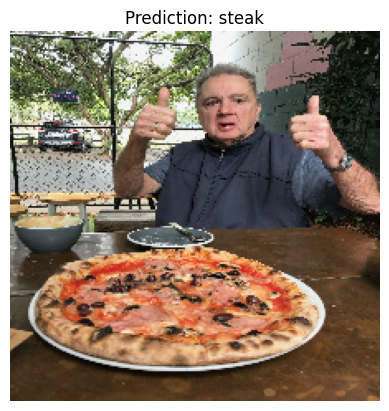

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-01-27 16:50:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.7MB/s    in 23s     

2025-01-27 16:50:26 (21.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 1

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


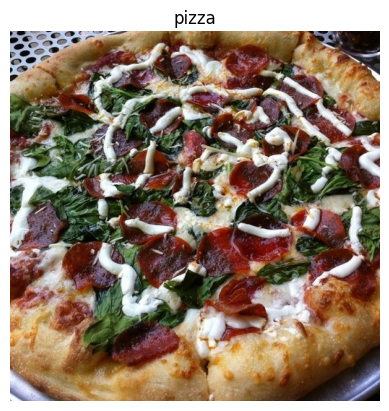

In [ ]:
img = view_random_image(target_class=random.choice(class_names),
                        target_dir=train_dir)

Image shape: (512, 512, 3)


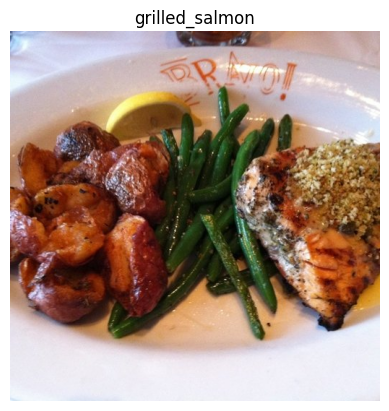

In [ ]:
img = view_random_image(target_class=random.choice(class_names),
                        target_dir=train_dir)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),

                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [ ]:
model_8 = Sequential()
model_8.add(Conv2D(10,3,activation='relu',input_shape=(224,224,3)))
model_8.add(Conv2D(10,3,activation='relu'))
model_8.add(MaxPool2D())
model_8.add(Conv2D(10,3,activation='relu'))
model_8.add(Conv2D(10,3,activation='relu'))
model_8.add(MaxPool2D())
model_8.add(Flatten())
model_8.add(Dense(10,activation='softmax'))



model_8.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_8.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = int(0.25*len(train_data)),
                        validation_data = test_data,
                        validation_steps =int(0.25*len(test_data)))

Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.1120 - loss: 2.3800 - val_accuracy: 0.1414 - val_loss: 2.2601
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.1620 - loss: 2.2345 - val_accuracy: 0.1431 - val_loss: 2.2647
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.2192 - loss: 2.1428 - val_accuracy: 0.2352 - val_loss: 2.1382
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - accuracy: 0.2631 - loss: 2.0393 - val_accuracy: 0.2516 - val_loss: 2.0847
Epoch 5/5
 3/58 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2222 - loss: 2.1349

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2288 - loss: 2.1311 - val_accuracy: 0.3088 - val_loss: 1.9586


In [ ]:
result_8 = model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.2620 - loss: 2.0371


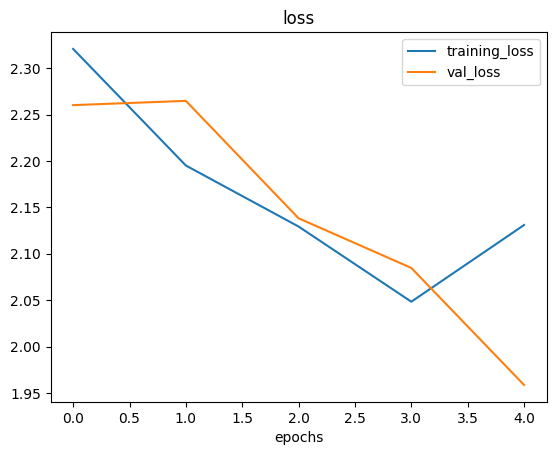

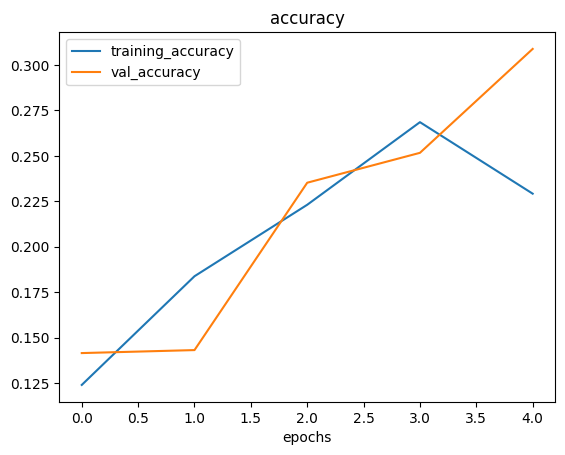

In [ ]:
plot_loss_curves(history_8)

In [ ]:
model_9 = Sequential()
model_9.add(Conv2D(10,3,activation='relu',input_shape=(224,224,3)))
model_9.add(MaxPool2D())
model_9.add(Conv2D(10,3,activation='relu'))
model_9.add(MaxPool2D())
model_9.add(Flatten())
model_9.add(Dense(10,activation='softmax'))

model_9.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_9.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = int(0.25*len(train_data)),
                        validation_data = test_data,
                        validation_steps =int(0.25*len(test_data)))

Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - accuracy: 0.1604 - loss: 2.3169 - val_accuracy: 0.2056 - val_loss: 2.1620
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.2506 - loss: 2.0573 - val_accuracy: 0.2681 - val_loss: 2.0565
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.3171 - loss: 1.9529 - val_accuracy: 0.2566 - val_loss: 2.0558
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.3534 - loss: 1.8943 - val_accuracy: 0.2928 - val_loss: 2.0191
Epoch 5/5
 1/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3125 - loss: 1.8774

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4139 - loss: 1.7629 - val_accuracy: 0.3088 - val_loss: 2.0605


In [ ]:
result_9 = model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.2950 - loss: 1.9863


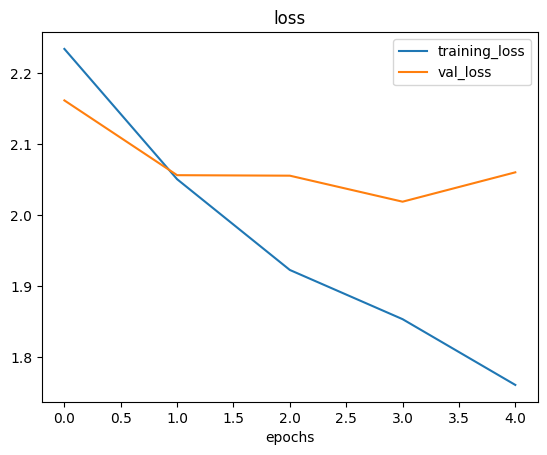

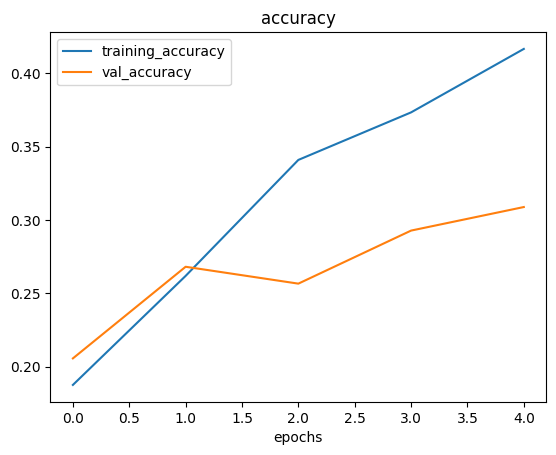

In [ ]:
plot_loss_curves(history_9)

In [ ]:
model_10 = Sequential()
model_10.add(Conv2D(10,3,activation='relu',input_shape=(224,224,3)))
model_10.add(MaxPool2D())
model_10.add